# EDA on Melbourne Housing

Jessica Felts

### Overview & About the Data
Melbourne is the second largest city in Australia, and has recently seen an explosive grown in the housing market. The purpose of this EDA is to analyze trends in the housing market and determine if there is information valuable to customers or investors.

### Analysis
The following questions will be answered through this EDA:
1. Is there a price trend in regards to home age?
2. Is there a price trend in regards to home location?
3. Does the type of housing unit dictate price? If so, what sort of trends are observed?
4. Are there particular areas that investors should observe overall, both for home price and home age?
The questions delineated below will in turn answer the questions above, and are a series of steps through the analysis. A final analysis will be given at the end to summarize the findings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

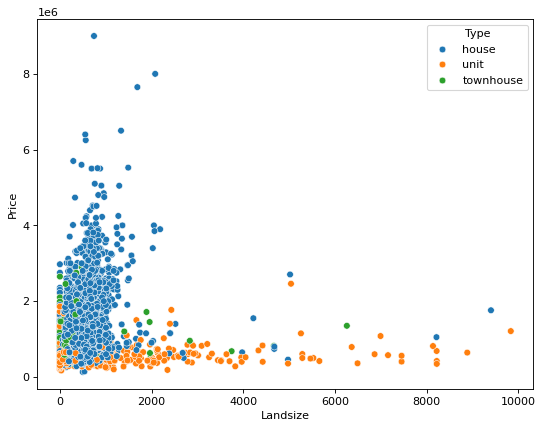

In [8]:
# Question 1: Create a scatter plot that shows land size on the x-axis and price on the y-axis. Change the color of the points to reflect the type of the property. 

plt.figure(figsize=(8, 6), dpi=80) 
sns.scatterplot(data = df, x = 'Landsize', y = 'Price', hue = 'Type') 
plt.show()

In [ ]:
# Question 2: In the graph created previously, two distinct patterns appear where one type of property experiences a price increase with just a slight increase in land size 
    # and another type of property experiences only small price increases as land size increases. Which type of property experiences a steep price increase as the land size goes up?

    # Houses experience a steep increase in price as each listing increases in land size. The "unit" only increases a slight amount in price when it increases in land size.

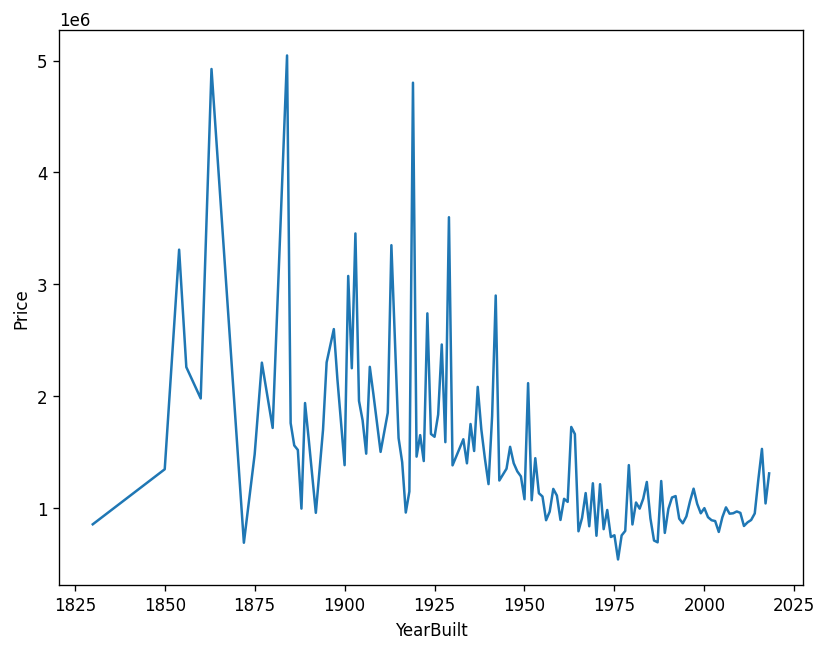

In [12]:
# Question 3: Create a line chart that shows the year built along the x-axis and the average price per year on the y-axis. You will need to use aggregation and group by to accomplish this. 

avg_price_year = df.groupby('YearBuilt', as_index = False)['Price'].mean()

plt.figure(figsize=(8, 6), dpi=120) 
sns.lineplot(data = avg_price_year, x = 'YearBuilt', y = 'Price') 
plt.show()

In [ ]:
# Question 4: According to the line chart produce above, does the average price of properties seem to increase or decrease as the property becomes newer?

    # Overall, it appears that there is a trend indicated that newer homes have a slightly lower price than older homes. (Which, honestly, suprises me a lot, because that's not the trend that I observe in my local environment)

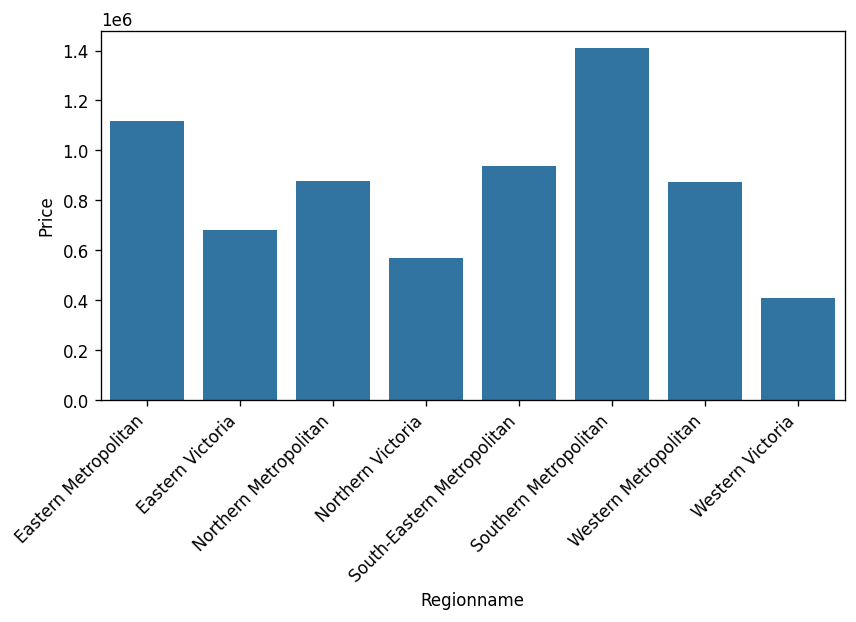

In [15]:
# Question 5: Create a bar chart that shows the region on the x-axis and the average price of the property on the y-axis. You will need to use aggregation and group by to accomplish this. 

avg_price_region = df.groupby('Regionname', as_index = False)['Price'].mean()

plt.figure(figsize=(8, 4), dpi=120) 
sns.barplot(data = avg_price_region, x = 'Regionname', y = 'Price') 
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# Question 6: According to the bar chart above, properties appear to have the highest average price in which region?

    # Properties in the Southern Metropolitan area appear to have the highest average price, followed tecond by the Eastern Metropolitan area. 
    # Conversely, the region with the least expensive homes are Western Victoria, with the second least expensive area being Northern Victoria.

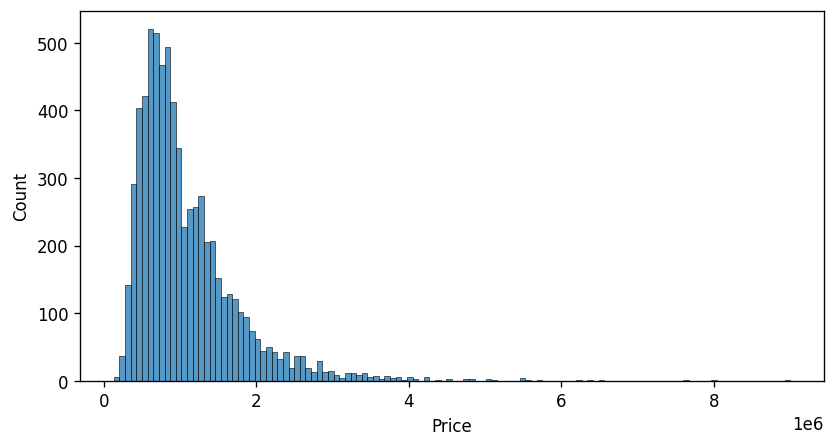

In [17]:
# Question 7: Create a histogram of property prices. 

plt.figure(figsize=(8, 4), dpi=120) 
sns.histplot(data = df, x = 'Price') 
plt.show()

In [ ]:
# Question 8: According to the histogram above, are the prices for properties right skewed, left skewed, or not skewed at all?

# According to this graph, the prices for properties are heavily right skewed. This means that the overall average price of homes will be higher than both the median and the mode of the overall prices.
    # In other words, the overall average is higher than the middle value (median) of the data, and is also higher than the most common value (mode) of the data.

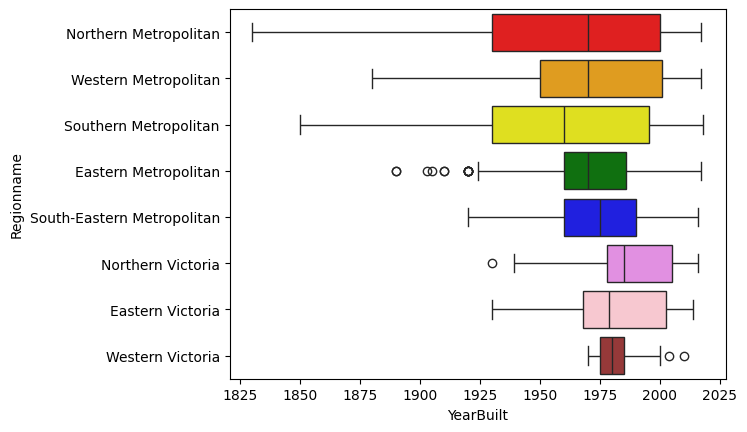

In [22]:
# Question 9: Create a box plot that shows the years that each property was built on the x-axis and the region on the y-axis. These box plots should be oriented horizontally.

sns.boxplot(data = df, x='YearBuilt', y='Regionname', orient='h', hue = 'Regionname', palette = ['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'pink', 'brown'])
plt.show()

In [ ]:
# Question 10: According to the box plot above, which region has properties built in the widest range of time?

    # According to the graph above, the Northern Metropolitan area has the widest range of home age, followed second by Southern Metropolitan. 
        # Conversely, the area with the narrowest range of age (and also the youngest homes) is Western Victoria. 

    # These home ages are interesting to note, given that in Question 5/6, it was pointed out that properties in the Southern Metropolitan area had the highest average price, and homes in 
        # Western Victoria has the lowest average price.

In [ ]:
# Question 11: According to the box plot above, which region is the only region that has very few properties listed that were built after the year 2000?

    # Western Victoria only shows two homes built after 2000 that are listed.

# Final analysis

By looking over all the data above, and referring to the questions in the intro, a number of trends can be observed: 
1. The price of a home tends to increase if it is older, but decrease if it's younger.
2. Homes in the Southern and Eastern Metropolitan areas are the most expensive, but homes in Western and Northern Victoria are the least expensive. Related to this note, homes in the Northern and Southern Metropolitan areas have the greatest range of home age (with the oldest homes located in the Northern Metropolitan areas), whereas Western Victoria has the newest homes.
3. Homes have the greatest variability in price, with even a slight increase in land size causing a dramatic increase in price. However, listing under the type "unit" have the lowest variability in price per increase in land size. However, whatever dictates a the title of a "unit" should be investigated more closely to ensure that it's comparable to a "home".
4. If investors would like to spend the least amount of money and don't mind the age of a home, Western Victoria would be an ideal area to consider. However, if investors are looking for age and character in a home and the pricing is more flexible, the Northern and Southern Metropolitan areas should be considered.

I think it would also be of value for investors to consider amenities in the area (schools, shopping, coastline, housing density, crime rates, etc.), and it would be valuable data to add to this data set for future analysis.